In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("casting/")

Found 1300 files belonging to 2 classes.


In [3]:
dataset.class_names

["defective'", "non defective'"]

In [38]:
class_name=dataset.class_names

In [5]:
len(dataset)


41

In [6]:
train_ds=dataset.take(35)

In [7]:
test_ds=dataset.skip(35)

In [8]:
len(test_ds)

6

# Model

In [48]:
model=tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(256,256,3)),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(2,activation="sigmoid"),
])


In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 30, 128)     

In [50]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [52]:
history=model.fit(
    train_ds,
    batch_size=32,
    epochs=5,
)

Epoch 1/5
35/35 [==============================] - 29s 831ms/step - loss: 0.4798 - accuracy: 0.7714
Epoch 2/5
35/35 [==============================] - 29s 818ms/step - loss: 0.4572 - accuracy: 0.7848
Epoch 3/5
35/35 [==============================] - 28s 804ms/step - loss: 0.4289 - accuracy: 0.8089
Epoch 4/5
35/35 [==============================] - 29s 812ms/step - loss: 0.3204 - accuracy: 0.8580
Epoch 5/5
35/35 [==============================] - 28s 803ms/step - loss: 0.2870 - accuracy: 0.8804


# Testing

In [53]:
model.evaluate(test_ds)

6/6 [==============================] - 2s 162ms/step - loss: 0.3174 - accuracy: 0.8889


[0.31739479303359985, 0.8888888955116272]

In [54]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 27ms/step


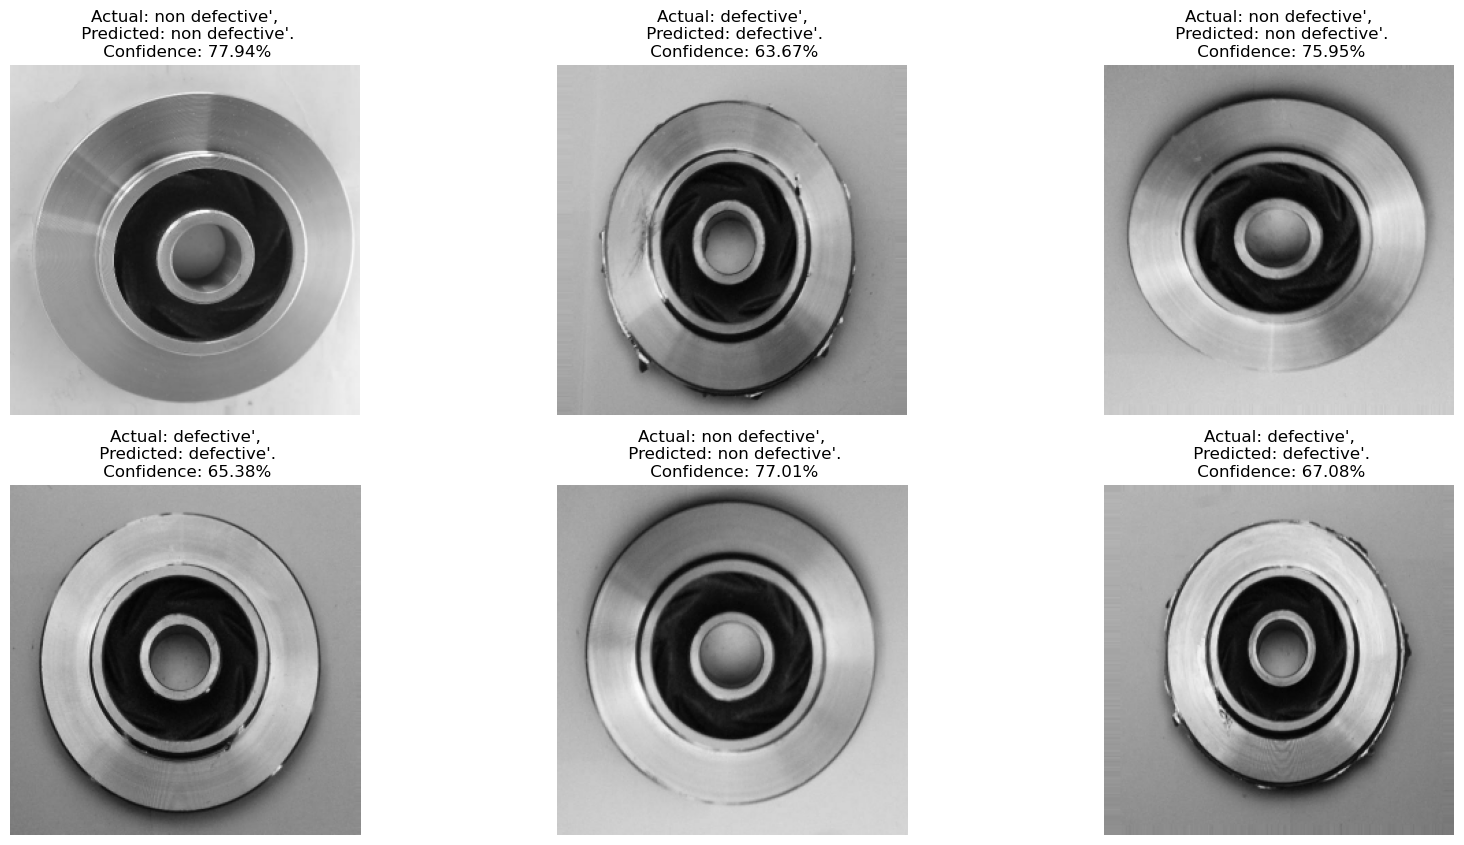

In [56]:
plt.figure(figsize=(20, 10))
for images, labels in test_ds:
    for i in range(6):
        ax = plt.subplot(2,3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
    break

In [60]:
act_lab=[]
pred_lab=[]
c=0
for images, labels in test_ds:
    for i in range(32):
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i])]
        act_lab.append(actual_class)
        pred_lab.append(predicted_class)
        c=c+1
        if c==179:
            break
        print(c)

1/1 [==============================] - 0s 34ms/step
1
1/1 [==============================] - 0s 28ms/step
2
1/1 [==============================] - 0s 32ms/step
3
1/1 [==============================] - 0s 32ms/step
4
1/1 [==============================] - 0s 32ms/step
5
1/1 [==============================] - 0s 33ms/step
6
1/1 [==============================] - 0s 31ms/step
7
1/1 [==============================] - 0s 29ms/step
8
1/1 [==============================] - 0s 25ms/step
9
1/1 [==============================] - 0s 32ms/step
10
1/1 [==============================] - 0s 30ms/step
11
1/1 [==============================] - 0s 27ms/step
12
1/1 [==============================] - 0s 29ms/step
13
1/1 [==============================] - 0s 28ms/step
14
1/1 [==============================] - 0s 30ms/step
15
1/1 [==============================] - 0s 28ms/step
16
1/1 [==============================] - 0s 29ms/step
17
1/1 [==============================] - 0s 24ms/step
18
1/1 [==============

1/1 [==============================] - 0s 26ms/step
149
1/1 [==============================] - 0s 32ms/step
150
1/1 [==============================] - 0s 29ms/step
151
1/1 [==============================] - 0s 28ms/step
152
1/1 [==============================] - 0s 32ms/step
153
1/1 [==============================] - 0s 26ms/step
154
1/1 [==============================] - 0s 26ms/step
155
1/1 [==============================] - 0s 31ms/step
156
1/1 [==============================] - 0s 35ms/step
157
1/1 [==============================] - 0s 26ms/step
158
1/1 [==============================] - 0s 27ms/step
159
1/1 [==============================] - 0s 31ms/step
160
1/1 [==============================] - 0s 28ms/step
161
1/1 [==============================] - 0s 34ms/step
162
1/1 [==============================] - 0s 34ms/step
163
1/1 [==============================] - 0s 27ms/step
164
1/1 [==============================] - 0s 31ms/step
165
1/1 [==============================] - 0s 26ms/s

In [62]:
from sklearn.metrics import confusion_matrix

con_mat=confusion_matrix(y_true=act_lab,y_pred=pred_lab)

<Axes: >

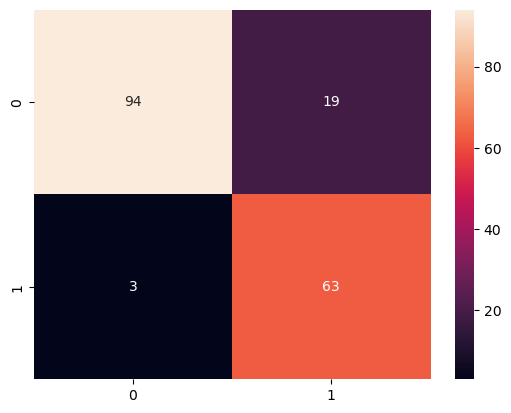

In [63]:
import seaborn as sns
sns.heatmap(con_mat, annot=True)

In [65]:
from sklearn.metrics import classification_report
print('Classification Report:\n', classification_report(act_lab, pred_lab))

Classification Report:
                 precision    recall  f1-score   support

    defective'       0.97      0.83      0.90       113
non defective'       0.77      0.95      0.85        66

      accuracy                           0.88       179
     macro avg       0.87      0.89      0.87       179
  weighted avg       0.90      0.88      0.88       179

